# **INF131-Data Science and Web Mining**
----------
   ## *Bike Sharing Demand Project*
   ------------------
  * Η συγκεκριμένη εργασία υλοποιήθηκε στα πλαίσια του μαθήματος "Εξόρυξη Γνώσης απο Βάσεις Δεδομένων και τον Παγκόσμιο Ιστό". Σκοπός είναι η πρόβλεψη του αριθμού ποδηλάτων που θα χρειαστούν σε κάθε ώρα της ημέρας, βασισμένη σε δεδομένα όπως η θερμοκρασία, ο καιρός, αν πρόκειται για εργάσιμη μέρα κλπ.
  -----
### Ονόματα Ομάδας
* Eclass: Ομάδα Χρηστών 12
* Kaggle: TeamYellow
--------------   
### Εργάστηκαν
* Κωνσταντίνου Βασίλειος 3150085
* Μιχαλάρης Ζήση 3150224
* Ρούσσος Μιχαήλ 3150148
-------------
Συνολικός χρόνος τρεξίματος περίπου 13 λεπτά

## Βιβλιοθήκες
* Αρχικά ξεκινάμε με την εισαγωγή των απαιτούμενων βιβλιοθηκών, ορισμένες απο τις οποίες θα μας βοηθήσουν στην υλοποίηση των διαγραμμάτων όπως η seaborn και η pyplot, ενώ άλλες όπως η RandomForestRegressor, η MLPRegressor και η Keras, είναι απαραίτητες για την λειτουργία των αλγορίθμων και των νευρωνικών δικτύων που χρησιμοποιήσαμε. Θα αναφερθούμε όμως αναλυτικότερα στην λειτουργία κάθε βιβλιοθήκης παρακάτω όπου και τις χρησιμοποιούμε.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from scipy import stats
from numpy import median
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,ExtraTreesRegressor
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier 
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import QuantileTransformer
import copy
import re
from IPython.display import display
from pandas.api.types import is_string_dtype, is_numeric_dtype
import scipy
from scipy.cluster import hierarchy as hc
from sklearn.model_selection import ShuffleSplit
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

* Στο σημείο αυτό εισάγουμε τα αρχεία που περιέχουν τα δεδόμενα τα οποία είναι απαραίτητα για την πρόβλεψη μας και μετανομάζουμε τις στήλες έτσι ώστε να είναι πιο ευανάγνωστες.

In [2]:
filename2 = '../input/inf131-2019/train.csv' 
dataframe_train = pd.read_csv(filename2)
dataframe_train.head(1)
dataframe_train.isnull().sum()
dataframe_train.rename(columns={'weathersit':'weather','mnth':'month','hr':'hour','yr':'year','hum': 'humidity','cnt':'count'},inplace=True)

## **Feature Engineering**
----------
Στη συνέχεια θα αναλύσουμε τις τεχνικές feature engineering που χρησιμοποιήσαμε έτσι ώστε να τροποποιήσουμε τα δεδομένα κατάλληλα για να έχουμε μια καλύτερη πρόβλεψη.

## Data Scaling
* Μία πρώτη προσέγγιση είναι η κλιμάκωση των τιμών ορισμένων δεδομένων όπως η ταχύτητα του ανέμου, οι οποίες είχαν πολύ μεγάλο εύρος και οι ανώτερες τιμές τους αναφέρονταν σε ακραία φαινόμενα τα οποία και αποτελούσαν εξαιρέσεις και ενδεχομένως να επηρέαζαν αρννητικά την πρόβλεψη.  
Χρησιμοποιήσαμε το QuantileTransformer, το οποίο μετατρέπει τις τιμές σε μία ομοιόρφη κατανομή τείνοντας να κατανείμει τις πιο συχνές τιμές και μειώνοντας παράλληλα τον αντίκτυπο των outliers. Για τον λόγο αυτό, επιλέξαμε όλες οι τιμές να κυμαίνονται απο το -1 εως και το 1.  
Στη συνέχεια με την βοήθεια της βιβλιοθήκης seaborn σχεδιάσαμε το γράφημα πριν και μετά την διαδικασία. Παρ'όλα αυτά, στην πράξη η συγκεκριμένη διαδικασία δεν βελτίωσε την πρόβλεψη όπως περιμέναμε.

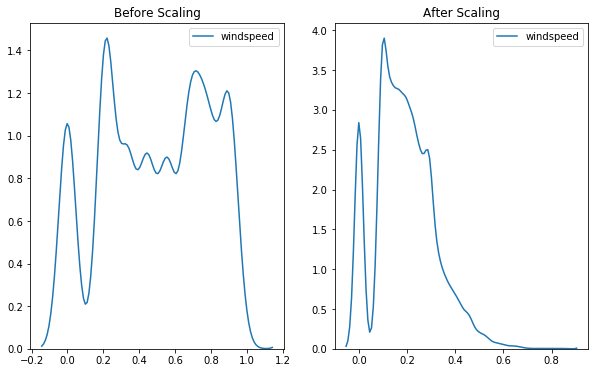

In [3]:
temp=dataframe_train.copy()
qt = QuantileTransformer(n_quantiles=10, random_state=0)
temp['windspeed'] = qt.fit_transform(dataframe_train['windspeed'].values.reshape(-1, 1))

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(10,6))
ax1.set_title('Before Scaling')
sn.kdeplot(dataframe_train['windspeed'],ax=ax2)
ax2.set_title('After Scaling')
sn.kdeplot(temp['windspeed'],ax=ax1)
plt.show()

## Categorical Values
* Επίσης παρατηρήσαμε ότι ορισμένα δεδόμενα όπως ο καιρός περιείχαν κατηγορίες τις οποίες όμως τις χειριζόμασταν ως ακέραιους αριθμούς(1,2,3,4), τα μετατρέψαμε σε κατηγορικές μεταβλητες.  
* Αφού εφαρμόσαμε την παραπάνω διαδικασία,αποφασίσαμε να αφαιρέσουμε απο το dataframe τις μεταβλητές atemp,casual,registered και humidity διότι το atemp μας έδινε τις ίδιες σχεδόν πληροφορίες με το temp καθώς υπήρχε πολύ μεγάλη συσχετιση μεταξύ των δύο. Τα casual και registered τα αφαιρέσαμε διότι αποτελούν στην ουσία και τα δύο μαζί το count το οποίο και θέλουμε να προβλέψουμε και έτσι θα είχαμε μεγάλο overfit. Τέλος, το humidity αποφασίσαμε να το αφαιρέσουμε διότι μετά απο την διαδικασία του feature importance που θα δούμε παρακάτω είδαμε ότι πρόσθετε αρκετό "θόρυβο" και επηρέαζε αρνητικά την πρόβλεψη. 


In [4]:
dataframe_train['season'] = dataframe_train.season.astype('category')
dataframe_train['year'] = dataframe_train.year.astype('category')
dataframe_train['month'] = dataframe_train.month.astype('category')
dataframe_train['hour'] = dataframe_train.hour.astype('category')
dataframe_train['holiday'] = dataframe_train.holiday.astype('category')
dataframe_train['weekday'] = dataframe_train.weekday.astype('category')
dataframe_train['workingday'] = dataframe_train.workingday.astype('category')
dataframe_train['weather'] = dataframe_train.weather.astype('category')
dataframe_train = dataframe_train.drop(['atemp', 'casual', 'registered','humidity'], axis=1)
dataframe_train.head(1)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,windspeed,count
0,4,0,11,0,0,2,1,1,0.56,0.3582,22


## Dataframes

* Στην περίπτωση των αλγορίθμων που χρησιμοποιούν δέντρα παρατηρήσαμε όμως οτι το one hot vector, το οποίο έχουμε εφαρμόσει παρακάτω για τα νευρωνικά δίκτυα, δεν τους ευνοεί και έτσι κάνουν χειρότερες προβλέψεις με αποτέλεσμα να φτιάξουμε ένα dataframe το οποίο περιέχει τις μη τροποποιημένες μεταβλητές.  
* Στην μεταβλητή Χ_raw εκχωρούμε τα δεδομένα εκπαίδευσης και στην μεταβλητη Υ_raw την μεταβλητή count την οποία και θέλουμε να προβλέψουμε. Έπειτα χωρίζουμε τα δεδομένα σε Χ_raw_train και Y_raw_train, Χ_raw_test και Y_raw_test προκειμένου να γίνει η εκπαίδευση και το validation. Τέλος,μετά απο διάφορες δοκιμές που κάναμε αποφασίσαμε να κάνουμε την εκπαίδευση του αλγορίθμου στο 80% των δεδομένων και ο έλεγχος να γίνει στο υπόλοιπο 20%, που όμως περιέχουν πάντα διαφορετικά δεδομένα καθώς επιλέγονται με τυχαίο τρόπο.

In [5]:
X_raw = dataframe_train[['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday','weather', 'temp', 'windspeed']]
Y = dataframe_train['count']
X_raw_train, X_raw_test, Y_raw_train, Y_raw_test = train_test_split(X_raw, Y, test_size=0.2, random_state=42)

## One Hot Encoding
* Μία τρίτη τεχνική που χρησιμοποιήσαμε είναι το one hot encoding το οποίο εφαρμόζεται στα ήδη κατηγοριοποιημένα δεδομένα.  
* Στο παρακάτω κελί χρησιμοποιούμε την μέθοδο getDummies του scikit learn, η οποία και μετατρέπει όπως αναφέραμε τις κατηγορικές μεταβλητές σε one hot vector.


In [6]:
dataframe_train = pd.get_dummies(dataframe_train)


* Στη συνέχεια δημιουργουμε το καινόυριο dataframe στο οποίο προσθέτουμε όλες τις στήλες που θα χρησιμοποιήσουμε για την πρόβλεψη.  
* Στη συγκεκριμένη περίπτωση λόγω του οτι το weather_4 εμφανίζεται μονο 3 φορές στα δεδομένα( 0.025%) θεωρούμε οτι αποτελεί πολύ μεγάλο outlier και έτσι δεν το προσθέτουμε στο τελικό dataframe για την πρόβλεψη.  
* Τέλος, εκχωρούμε το dataframe στο πίνακα X και ακολουθούμε την διαδικασία που περιγράφικε προηγουμένώς.


In [7]:
X = dataframe_train[['temp', 'windspeed', 'season_1', 'season_2', 'season_3',
       'season_4', 'year_0', 'year_1', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1','weather_1', 'weather_2',
       'weather_3']]
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

(12165, 58)


## Απαραίτητες Μέθοδοι
----

* Η μέθοδος data παίρνει σαν όρισμα τον πίνακα με τις προβλέψεις μας και ελέγχει αν υπάρχουν σε αυτόν αρνητικές τιμές και αφού τις εντοπίσει τις αντικαθιστά με μηδενικές, αφού είναι αδύνατον να ενοικιαστεί αρνητικός αριθμός ποδηλάτων.

In [8]:
def data(my_pred):
    True in (my_pred < 0)
    for i, Y  in enumerate(my_pred):
        my_pred[i]=int(np.around([my_pred[i]]))
        if my_pred[i] < 0:
            my_pred[i] = 0
    return my_pred

* Η μέθοδος evaluate υπολογίζει και εκτυπώνει το R2 score και το RMSLE score πάνω στα οποία βασίζεται η αποδοτικότητα του μοντέλου μας. 


In [9]:
def evaluate(my_pred):
    print('RMSLE:', np.sqrt(mean_squared_log_error(Y_test, my_pred)))
    print('R2:', r2_score(Y_test, my_pred))
    return np.sqrt(mean_squared_log_error(Y_test, my_pred))

* Η μέθοδος evaluate_raw υπολογίζει και εκτυπώνει το R2 score και το RMSLE score, για το dataframe στο οποίο δεν έχουμε εφαρμόσει την μέθοδο του one hot vector, πάνω στα οποία βασίζεται η αποδοτικότητα του μοντέλου μας. 

In [10]:
def evaluate_raw(my_pred):
    print('RMSLE:', np.sqrt(mean_squared_log_error(Y_raw_test, my_pred)))
    print('R2:', r2_score(Y_raw_test, my_pred))
    return np.sqrt(mean_squared_log_error(Y_raw_test, my_pred))

## Feature Importance
--------------------------------
Μία τεχνική βελτίωσης των δεδομένων μας είναι αυτή του feature importance, στην οποία εφαρμόζουμε έναν απλό αλγόριθμο Random Forest μέσω της οποίας εξετάζουμε ποιες μεταβλητές είναι οι πιο σημαντικές και ποιες προσθέτουν τον μεγαλύτερο "θόρυβο". Έτσι, όπως αναφέραμε και πριν αποφασίσαμε να αφαιρέσουμε το humidity.

In [11]:
print("random forest")
clfr3 = RandomForestRegressor()
clfr3.fit(X_raw_train, Y_train)
Y_pred3 = clfr3.predict(X_raw_test)
Y_pred3 = data(Y_pred3)
value=0
value= evaluate_raw(Y_pred3)
#Use the feature importance to find the most important ones
feature_importance = pd.DataFrame({'Feature' : X_raw_train.columns, 'Importance' : clfr3.feature_importances_})
feature_importance.sort_values('Importance', ascending=False, inplace=True)
feature_importance.head(-1)



random forest


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSLE: 0.3502845873741262
R2: 0.917257657168835


,Feature,Importance
3,hour,0.604298
8,temp,0.148134
1,year,0.077589
6,workingday,0.065711
7,weather,0.024418
0,season,0.023987
2,month,0.019648
5,weekday,0.017202
9,windspeed,0.016991


* Στον παραπάνω πίνακα βλέπουμε σε φθίνουσα σειρά την σημαντικότητα των υπόλοιπων μεταβλητών.  
* Παρακάτω βλέπουμε και το ανάλογο διάγραμμα.

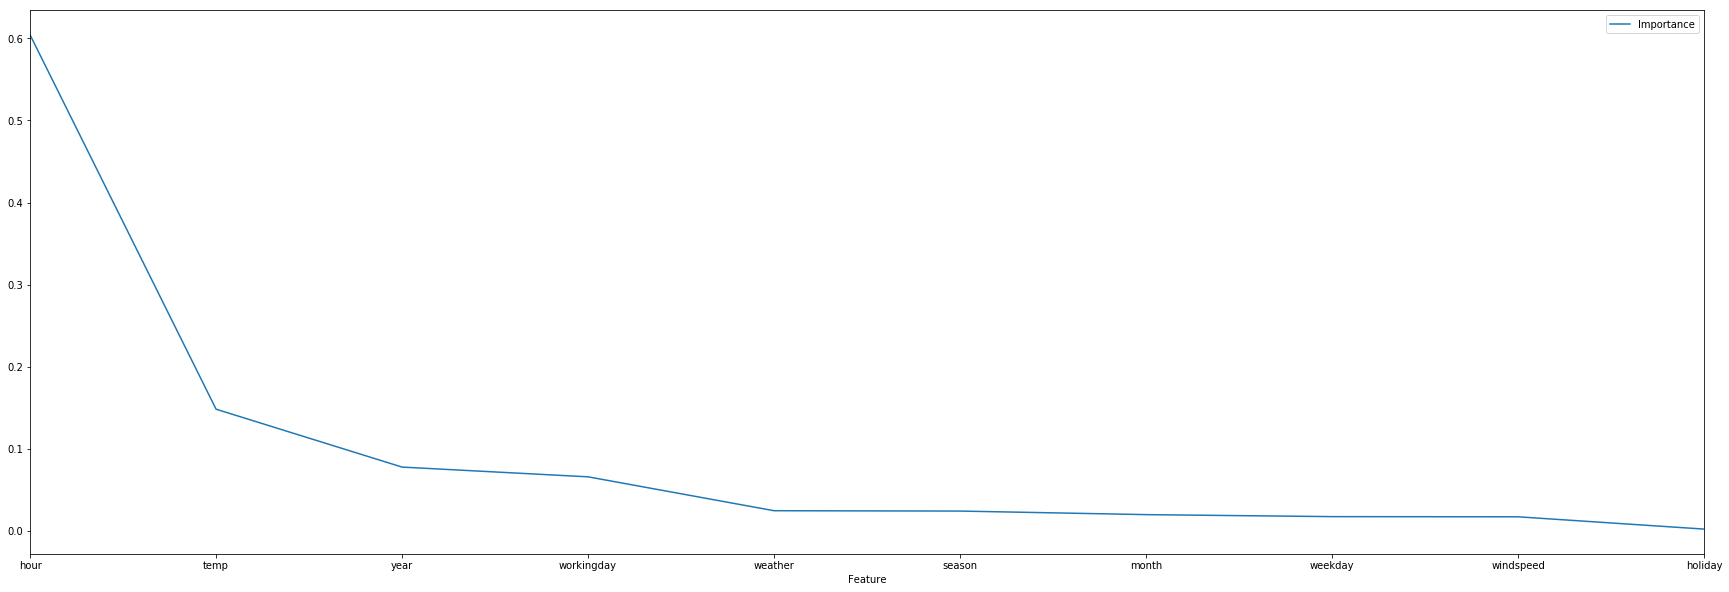

In [12]:
feature_importance.plot('Feature', 'Importance',figsize=(30,10))

* Στο συγκεκριμένο κομμάτι αφαιρούμε τις μεταβλητές με βάση το importance και ελέγχουμε το αποδοτικότητα του αλγορίθμου.
~~~python
# Run the model for various cut off values for the importance to find the best set of importance features
for i in  [0.0005,0.000568,0.000675]:

    important_features = feature_importance[feature_importance['Importance'] > i]
    df_important = X[important_features['Feature']]
    len(df_important)
    X_raw_train, X_raw_test, Y_raw_train, Y_raw_test = train_test_split(df_important, Y, test_size=0.2, random_state=42)

    m = RandomForestRegressor()
    m.fit(X_raw_train, Y_raw_train)
    Y_pred = m.predict(X_raw_test)
    Y_pred = data(Y_pred)
    value= evaluate_raw(Y_pred)
~~~

* Παρακάτω φτιάχνουμε ένα δενδρόγραμμα που εμφανίζει την συσχέτιση των μεταβλητών.

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSLE: 0.3677389994797548
R2: 0.9133810909075335


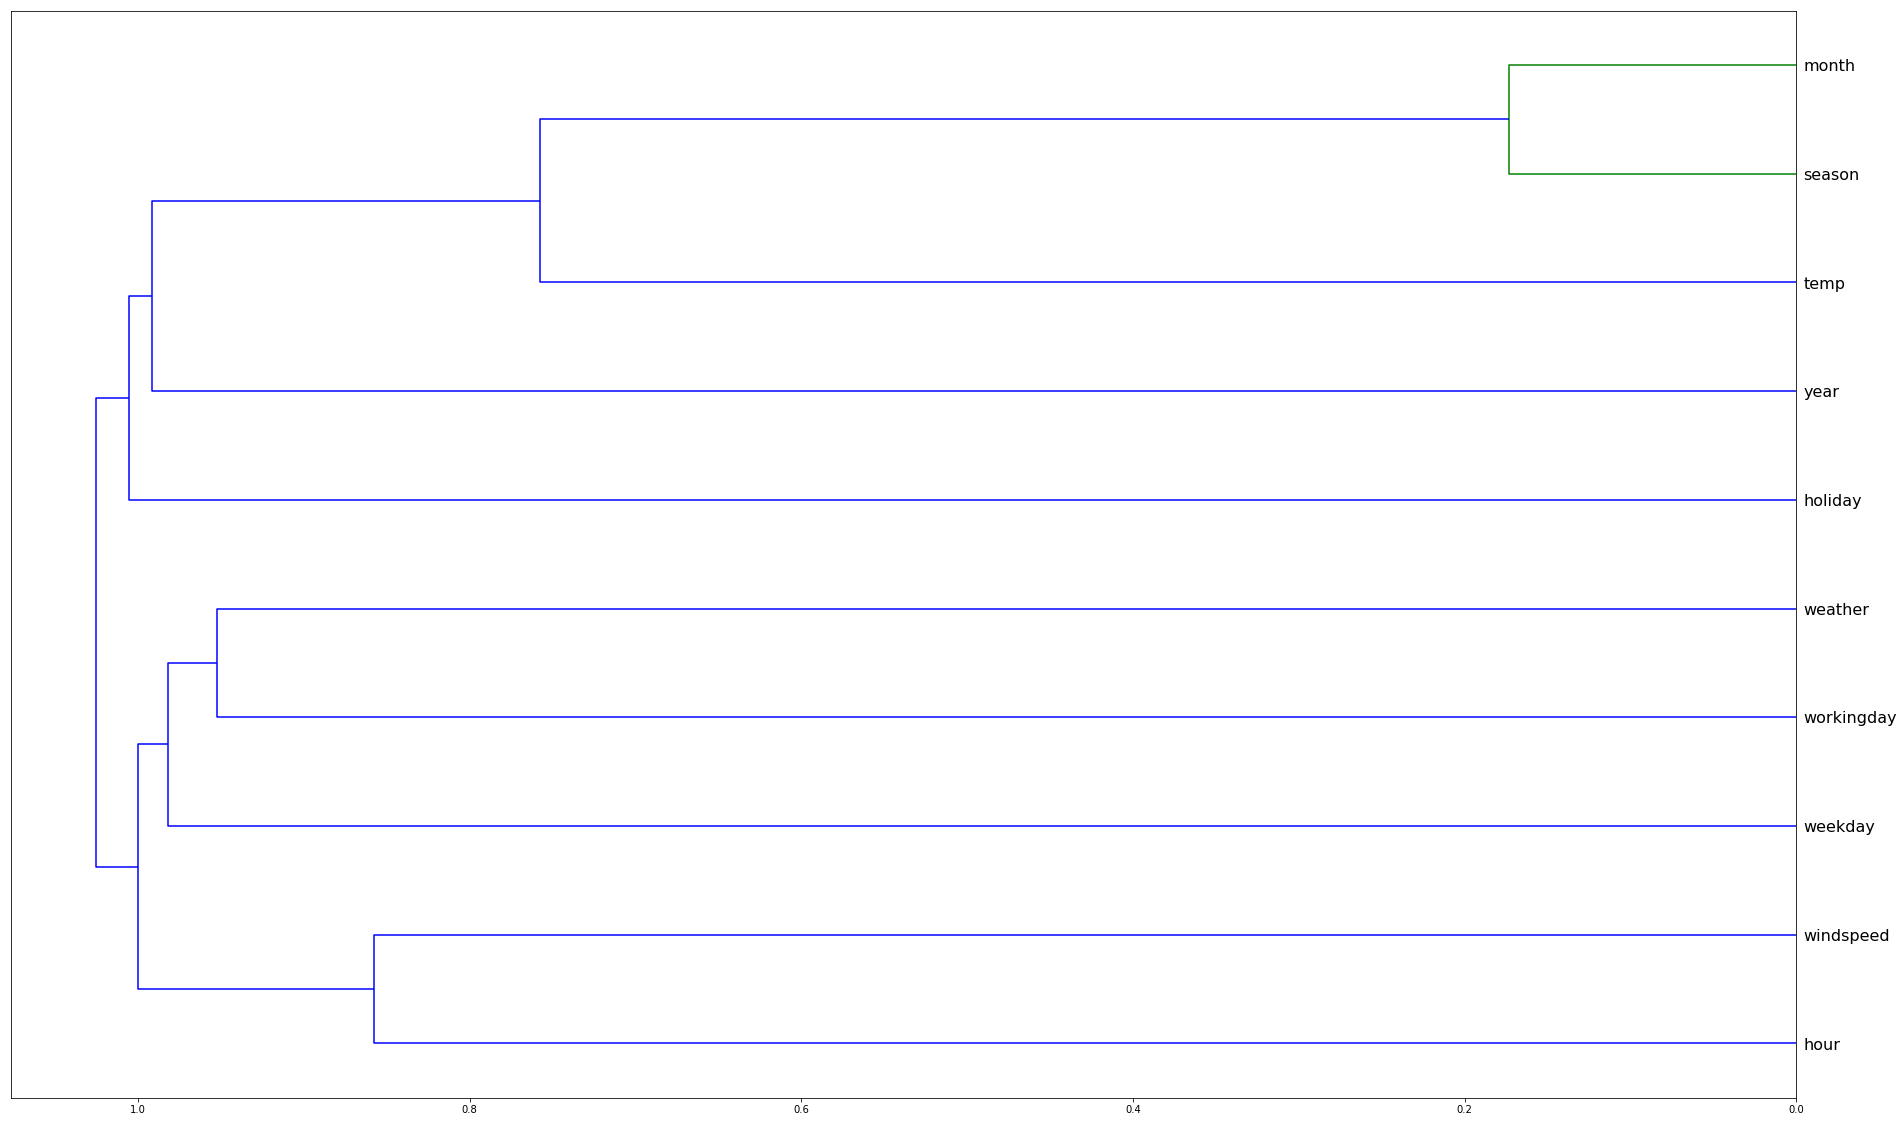

In [13]:
important_features = feature_importance[feature_importance['Importance']>0]
df_important = X_raw[important_features['Feature']]
len(df_important)
X_raw_train_feat, X_raw_test_feat, Y_raw_train_feat, Y_raw_test_feat = train_test_split(df_important, Y, test_size=0.2, random_state=42)

m = RandomForestRegressor()
m.fit(X_raw_train_feat, Y_raw_train_feat)
pred = m.predict(X_raw_test_feat)
pred = data(pred)
value = evaluate_raw(pred)

corr = np.round(scipy.stats.spearmanr(df_important).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(32,20))
dendrogram = hc.dendrogram(z, labels=df_important.columns, orientation='left', leaf_font_size=16)
plt.show()

## Αλγόριθμοι Πρόβλεψης
----------------

* Στο παρακάτω κελί αρχικοποιούμε έναν πίνακα values στον οποίο θα εκχωρήσουμε τα αποτελέσματα απο κάθε αλγόριθμο και νευρωνικό δίκτυο που χρησιμοποιήσαμε για να μπορέσουμε να τα συγκρίνουμε.

In [14]:
names=['Elastic','Bayes','Lasso','GradientBoosting','DecisionTree','ExtraTrees','RandomForest1','RandomForest2','MLPClassifier','MLPRegressor1','MLPRegressor2','Keras']
values = [0,0,0,0,0,0,0,0,0,0,0,0]

1. Ο πρώτος αλγόριθμος που δοκιμάσαμε είναι ο ElasticNet.

In [15]:
#ElasticNet
print("Elastic")
reg = ElasticNet()
reg.fit(X_train , Y_train)
pred = reg.predict(X_test)
pred = data(pred)
values[0]= evaluate(pred)

Elastic
RMSLE: 1.4741933630220037
R2: 0.17680527253341438


2. Ο δεύτερος αλγόριθμος είναι αυτός του Bayes

In [16]:
#Bayes
print("Bayes")
bays = linear_model.BayesianRidge()
bays.fit(X_train , Y_train) 
bays_pred = bays.predict(X_test)
bays_pred = data(bays_pred)
values[1]= evaluate(bays_pred)

Bayes
RMSLE: 1.1221194620808357
R2: 0.6888796364753106


3. Ο επόμενος αλγόριθμος που δοκιμάσαμε ειναι ο Lasso.

In [17]:
#Lasso
print('Lasso')
lasso = linear_model.Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,normalize=False, positive=False, precompute=False, random_state=None,selection='cyclic', tol=0.001, warm_start=True)
lasso.fit(X_train , Y_train)
lasso_pred = lasso.predict(X_test)
lasso_pred = data(lasso_pred)
values[2]= evaluate(lasso_pred)

Lasso
RMSLE: 1.1090588424893593
R2: 0.6877583495857502


4. Ένας ακόμη αλγόριθμος που εξετάσαμε είναι ο GradientBoostingRegressor.

In [18]:
#GradientBoostingRegressor
print("GradientBoostingRegressor")
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls').fit(X_train , Y_train)
gbr_pred = gbr.predict(X_test)
gbr_pred = data(gbr_pred)
values[3]= evaluate(gbr_pred)

GradientBoostingRegressor
RMSLE: 1.1504675977116465
R2: 0.5174212209157734


5. Ο DecisionTreeRegressor είναι ακόμα ένας αλγόριθμος που εξετάσαμε.

In [19]:
#DecisionTreeRegressor
print("DecisionTreeRegressor")
dtr = DecisionTreeRegressor(min_samples_split=20,min_impurity_decrease=0.001)
dtr.fit(X_raw_train, Y_raw_train)
dtr_pred = dtr.predict(X_raw_test)
dtr_pred = data(dtr_pred)
values[4]= evaluate_raw(dtr_pred)

DecisionTreeRegressor
RMSLE: 0.39484602967733157
R2: 0.8933803134507952


6. Ο επόμενος αλγόριθμος που εξετάσαμε είναι ο ExtraTreesRegressor

In [20]:
#ExtraTreesRegressor
print("ExtraTreesRegressor")
etr = ExtraTreesRegressor(n_estimators=150, max_features=10, random_state=0)
etr.fit(X_raw_train,Y_raw_train)
etr_pred = etr.predict(X_raw_test)
etr_pred = data(etr_pred)
values[5]= evaluate_raw(etr_pred)

ExtraTreesRegressor
RMSLE: 0.3372732022465412
R2: 0.9325794426542324


7. Επίσης εξετάσαμε και υλοποιήσαμε δύο Random Forest στις οποίες εφαρμόσαμε και gridSearch απ'όπου και προέκυψαν οι καλύτερες παράμετροι τις οποίες και χρησιμοποιήσαμε.  
*Σημείωση: Παράδειγμα χρήσης gridSearch υπάρχει πιο κάτω στην χρήση των νευρωνικών*

In [21]:
# RandomRorest1
print("Random Forest 1")
clfr = RandomForestRegressor(n_estimators=300,bootstrap=True,random_state=42, oob_score=True)
clfr.fit(X_raw_train, Y_raw_train)
Y_pred = clfr.predict(X_raw_test)
Y_pred = data(Y_pred)
values[6]= evaluate_raw(Y_pred)

# RandomRorest2
print("Random Forest 2")
clf1 = RandomForestRegressor(max_depth=40,max_features="auto",min_samples_leaf=1,n_estimators=300)
clf1.fit(X_raw_train,Y_raw_train)
Y_pred1 = clf1.predict(X_raw_test)
Y_pred1 = data(Y_pred1)
values[7]=evaluate_raw(Y_pred1)

Random Forest 1
RMSLE: 0.3438387960378094
R2: 0.9233674189392713
Random Forest 2
RMSLE: 0.3441567699055283
R2: 0.9231763651987859


## Νευρωνικά Δίκτυα sklearn

* Παρακάτω βλέπουμε ένα βασικό παράδειγμα χρήσης της gridSearch απο αυτά που δοκιμάσαμε. Το συγκεκριμένο εφαρμόζεται στον MLPRegressor του scikit learn.


~~~python
#neural netwok MLPRegressor
print("neural netwok MLPRegressor")
kfold = KFold(n_splits=10)
nn_MLPR = MLPRegressor(solver='adam',activation='relu',early_stopping= True,n_iter_no_change=20)
parameter_space = {
    'hidden_layer_sizes':[(30,30,30,30,30,30,30,30),(30,20,10),(200,200),(30,60,30),],
    'max_iter': [200,250,300,350,500,1000],
    'alpha': [0.07,0.01,0.1,0.08,1,10,0.81],
    'learning_rate': ['constant','adaptive']
}
clf = GridSearchCV(nn_MLPR, parameter_space, n_jobs=-1, cv=kfold,verbose=10,scoring='r2')
clf.fit(X_train, Y_train)
print('Best parameters found:\n', clf.best_params_)

nn_MLPR_pred=clf.predict(X_test)
nn_MLPR_pred = data(nn_MLPR_pred)
evaluate(nn_MLPR_pred)
~~~

* Με βάση τα αποτελέσματα διαφόρων gridSearch δημιουργήσαμε δύο νευρωνικά δίκτυα με διαφορετικές παραμέτρους για την καλύτερη δυνατή πρόβλεψη.

In [22]:
print("Neural Network MLPRegressor 1")
nn_MLPR1 = MLPRegressor(solver='adam',hidden_layer_sizes=(30,30,30,30,30,30,30,30),learning_rate= 'adaptive',random_state=49,warm_start=False,activation='relu', max_iter=350,alpha=0.077 )
nn_MLPR1.fit(X_train,Y_train)
nn_MLPR_pred=nn_MLPR1.predict(X_test)
nn_MLPR_pred = data(nn_MLPR_pred)
values[9] = evaluate(nn_MLPR_pred)

Neural Network MLPRegressor 1
RMSLE: 0.34616309991272987
R2: 0.9280756458895812


In [23]:
print("Neural Network MLPRegressor 2")
nn_MLPR2 = MLPRegressor(solver='adam',hidden_layer_sizes=(30,30,30,30,30,30,30,30), random_state=49,warm_start=False,activation='relu', max_iter=350,alpha=0.081 )
nn_MLPR2.fit(X_train,Y_train)
nn_MLPR_pred=nn_MLPR2.predict(X_test)
nn_MLPR_pred = data(nn_MLPR_pred)
values[10] = evaluate(nn_MLPR_pred)

Neural Network MLPRegressor 2
RMSLE: 0.34363554639089183
R2: 0.935893044382474


* Παρακάτω βλέπουμε ένα παράδειγμα χρήσης Cross Validation στον παραπάνω MLPRegressor.
~~~python
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(nn_MLPR2, X, Y, cv=cv)
~~~

* Παρ'όλο που ο MLPClassifier προορίζεται για την επίλυση προβλημάτων Classification, μετά από έναν πειραματισμό μας παρατηρήσαμε ότι έκανε εξίσου καλές προβλέψεις με τον αντίστοιχο Regressor και έτσι έπειτα απο συζήτηση με τον κ.Ούτσιο αποφασίσαμε να τον συμπεριλάβουμε και αυτόν στην λύση μας.


In [24]:
#neural network
print("neural network Classifier")
nn1 = MLPClassifier(solver='adam',hidden_layer_sizes=(30,30,30,30,30,30,30,30),learning_rate= 'adaptive' ,random_state=49,warm_start=False,activation='relu', max_iter=400,alpha=0.0084 )
nn1.fit(X_train,Y_train)
nn_pred=nn1.predict(X_test)
nn_pred = data(nn_pred)
values[8] = evaluate(nn_pred)

neural network Classifier
RMSLE: 0.3396144770666049
R2: 0.914104425199022


## Νευρωνικά Δίκτυα Keras
-------------
* Μετά την υλοποίηση των νευρωνικών δικτύων με την βιβλιοθήκη του sklearn ααποφασίσαμε να υλοποιήσουμε και νευρωνικά δίκτυα με την βιβλιοθήκη Keras/Tensorflow.  
Ύστερα απο δοκιμές με διαφορετικές τιμές καταλήξαμε στο παρακάτω νευρωνικό δίκτυο.

In [25]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=58, kernel_initializer='normal', activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.summary()
    return model

In [26]:
model = baseline_model()
optimizer = tf.keras.optimizers.Adam(0.07)
model.compile(loss='msle',optimizer=optimizer,metrics=['mse','msle'])
history = model.fit(X, Y, epochs=150, batch_size=int(len(X)/80),  verbose=1, validation_split=0.20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                1770      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                1860      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 5,491
Trainable params: 5,491
Non-trainable params: 0
_________________________________________________________________
Train on 9732 samples, validate on 2433 samples
Epoch 1/150
9732/9732 [==============================] - 1s 107us/sample - loss: 1.6728 - mse: 28634.9824 - msle: 1.6728 - val_loss: 0.2903 - val_mse: 10908.6260 - val_msle: 0.2903
Epoch 2/150
9732/9732 [

9732/9732 [==============================] - 0s 20us/sample - loss: 0.0982 - mse: 2683.7681 - msle: 0.0982 - val_loss: 0.1764 - val_mse: 4996.1113 - val_msle: 0.1764
Epoch 42/150
9732/9732 [==============================] - 0s 21us/sample - loss: 0.1096 - mse: 2901.8855 - msle: 0.1096 - val_loss: 0.1246 - val_mse: 4314.3960 - val_msle: 0.1246
Epoch 43/150
9732/9732 [==============================] - 0s 21us/sample - loss: 0.1110 - mse: 3118.6289 - msle: 0.1110 - val_loss: 0.2235 - val_mse: 7458.0024 - val_msle: 0.2235
Epoch 44/150
9732/9732 [==============================] - 0s 22us/sample - loss: 0.1183 - mse: 3548.1558 - msle: 0.1183 - val_loss: 0.1291 - val_mse: 3185.7136 - val_msle: 0.1291
Epoch 45/150
9732/9732 [==============================] - 0s 20us/sample - loss: 0.1070 - mse: 2868.4634 - msle: 0.1070 - val_loss: 0.1672 - val_mse: 6100.4316 - val_msle: 0.1672
Epoch 46/150
9732/9732 [==============================] - 0s 21us/sample - loss: 0.1152 - mse: 3251.3848 - msle: 0.115

Epoch 87/150
9732/9732 [==============================] - 0s 21us/sample - loss: 0.0938 - mse: 2456.4133 - msle: 0.0938 - val_loss: 0.1181 - val_mse: 3005.7378 - val_msle: 0.1181
Epoch 88/150
9732/9732 [==============================] - 0s 22us/sample - loss: 0.0955 - mse: 2498.8105 - msle: 0.0955 - val_loss: 0.1146 - val_mse: 2983.8552 - val_msle: 0.1146
Epoch 89/150
9732/9732 [==============================] - 0s 20us/sample - loss: 0.0924 - mse: 2425.7180 - msle: 0.0924 - val_loss: 0.1158 - val_mse: 3104.8267 - val_msle: 0.1158
Epoch 90/150
9732/9732 [==============================] - 0s 21us/sample - loss: 0.0924 - mse: 2395.4968 - msle: 0.0924 - val_loss: 0.1339 - val_mse: 3694.3259 - val_msle: 0.1339
Epoch 91/150
9732/9732 [==============================] - 0s 21us/sample - loss: 0.0994 - mse: 2667.4883 - msle: 0.0994 - val_loss: 0.1138 - val_mse: 3022.4385 - val_msle: 0.1138
Epoch 92/150
9732/9732 [==============================] - 0s 21us/sample - loss: 0.0980 - mse: 2508.5867 

9732/9732 [==============================] - 0s 20us/sample - loss: 0.0924 - mse: 2369.7395 - msle: 0.0924 - val_loss: 0.1191 - val_mse: 3105.7827 - val_msle: 0.1191
Epoch 133/150
9732/9732 [==============================] - 0s 21us/sample - loss: 0.0913 - mse: 2328.4092 - msle: 0.0913 - val_loss: 0.1207 - val_mse: 3511.5615 - val_msle: 0.1207
Epoch 134/150
9732/9732 [==============================] - 0s 20us/sample - loss: 0.0916 - mse: 2349.1182 - msle: 0.0916 - val_loss: 0.1214 - val_mse: 3458.2170 - val_msle: 0.1214
Epoch 135/150
9732/9732 [==============================] - 0s 21us/sample - loss: 0.0916 - mse: 2475.0198 - msle: 0.0916 - val_loss: 0.1163 - val_mse: 2805.1057 - val_msle: 0.1163
Epoch 136/150
9732/9732 [==============================] - 0s 20us/sample - loss: 0.0950 - mse: 2459.1331 - msle: 0.0950 - val_loss: 0.1183 - val_mse: 3015.9736 - val_msle: 0.1183
Epoch 137/150
9732/9732 [==============================] - 0s 22us/sample - loss: 0.0952 - mse: 2493.6389 - msle: 

In [27]:
print('Keras')
model_pred = model.predict(X_test)
model_pred= data(model_pred)
values[11]=evaluate(model_pred)

Keras
RMSLE: 0.299871913450837
R2: 0.9278895831597319


* Το παρακάτω γράφημα περιέχει τις αποδόσεις των αλγορίθμων και των νευρωνικών δικτύων που είδαμε μέχρι τώρα.

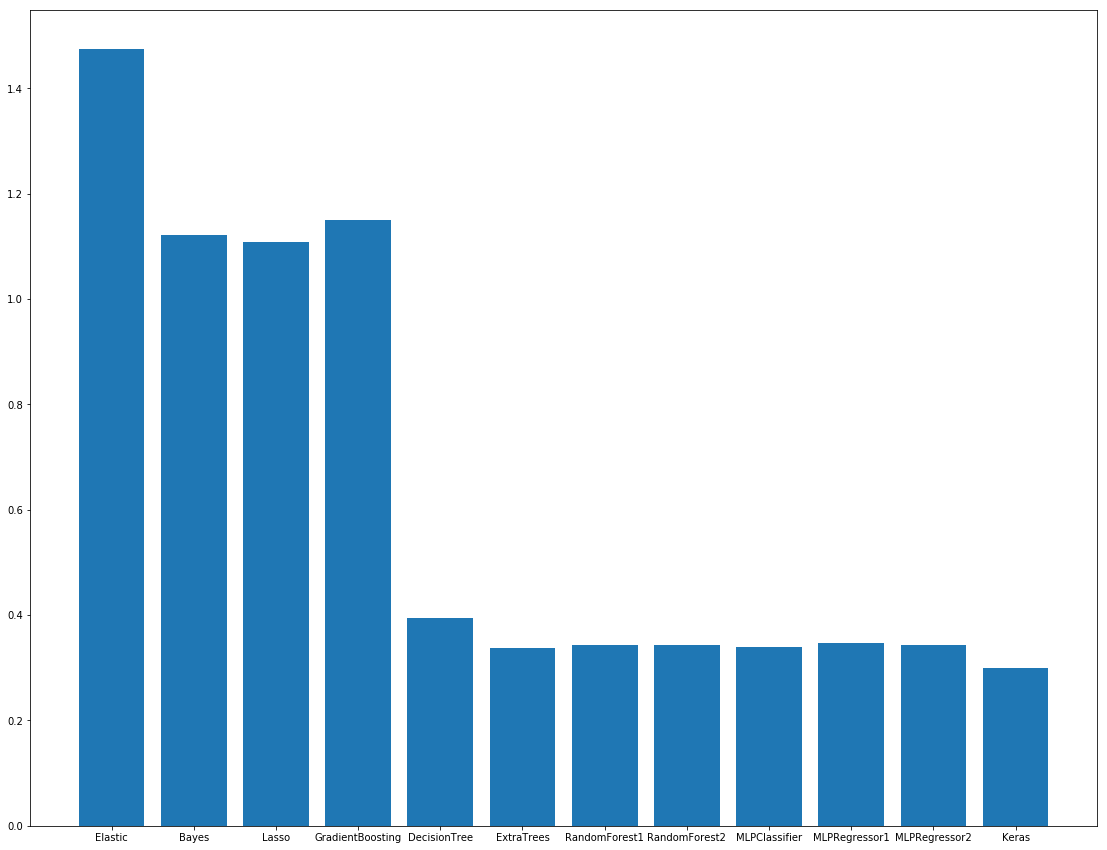

Text(0.5, 0.98, 'RMSLE Scores')

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(65,15))
plt.subplot(131)
plt.bar(names, values)
plt.show()
plt.suptitle('RMSLE Scores')

* Στη συνέχεια βλέπουμε ένα γράφημα στο οποίο εμφανίζονται με μπλέ εμφανίζονται οι πραγματικές τιμές που πρέπει να προβλέψουμε, με κόκκινο οι τιμές που πρόβλεψε ο χειρότερος αλγόριθμος και με πράσινο οι τιμές της καλύτερης πρόβλεψης.


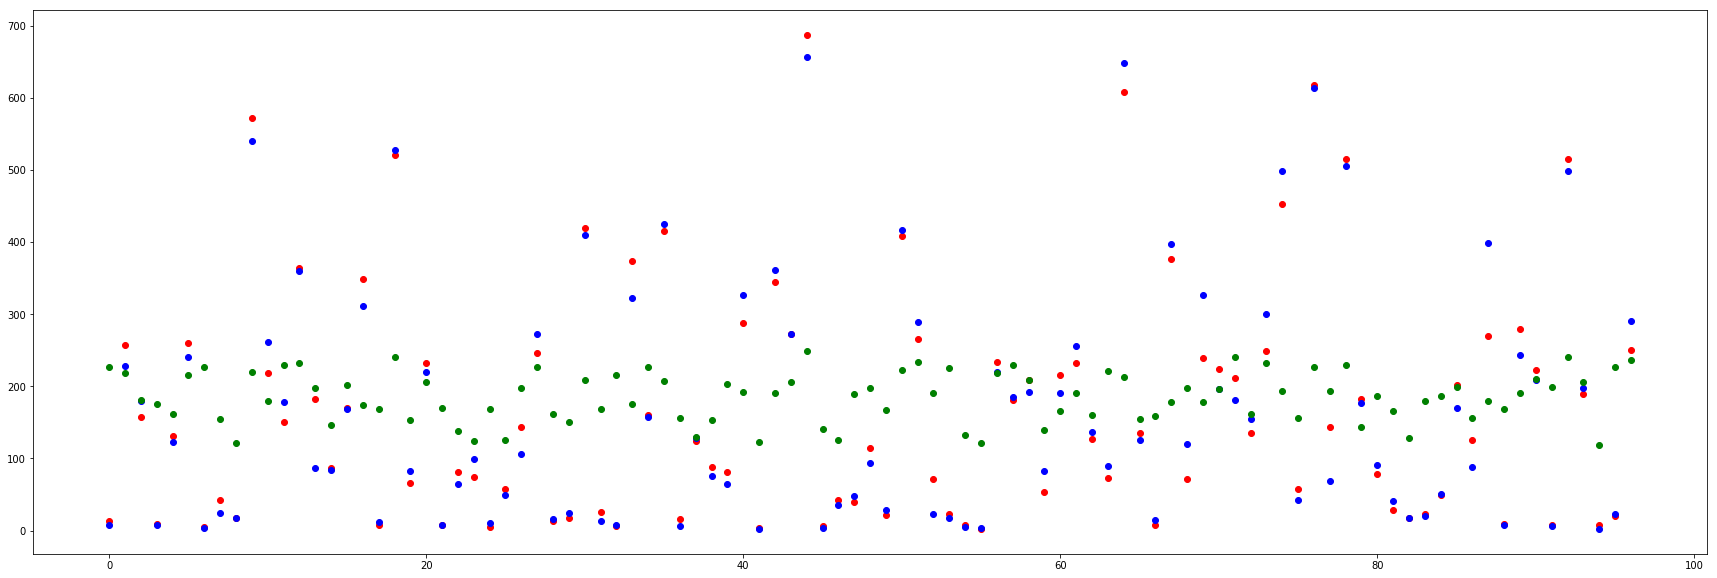

In [29]:
index = range(len(etr_pred)//25)
plt.figure(figsize=(30,10))
plt.plot(index,etr_pred[:len(etr_pred)//25],'ro',index,Y_test[:len(Y_test)//25],'bo',index,pred[:len(pred)//25],'go')
plt.show()

## Ensemble Voting
----------------
* Στη συνέχεια εφαρμόζουμε 2 φορές τον voting regressor της sklearn, μία για τα νευρωνικά δίκτυα και μία για τους τρείς καλύτερους αλγορίθμους πρόβλεψης. Ο λόγος είναι ότι έχουμε διαφορετικές διαστάσεις στους πίνακες εκπαίδευσης των αλγορίθμων και των νευρωνικών δικτύων.  
* Τέλος, ανάλογα με την απόδοση του κάθε αλγορίθμου δίνουμε και το ανάλογο βάρος στο ψήφισμα.

In [30]:
print('Neural voting')
voting = VotingRegressor(estimators=[('nn1',nn1),('nn_MLPR1',nn_MLPR1),('nn_MLPR2',nn_MLPR2)],n_jobs=-1,weights=[10,5,7])
voting.fit(X_train,Y_train)
voting_pred=voting.predict(X_test)
voting_pred = data(voting_pred)
evaluate(voting_pred)

Neural voting
RMSLE: 0.3060241535171971
R2: 0.9379183481985736


0.3060241535171971

In [31]:
print('Forest voting')
voting_raw = VotingRegressor(estimators=[('clfr',clfr),('clf1',clf1),('etr',etr)],n_jobs=-1,weights=[9,8,10])
voting_raw.fit(X_raw_train,Y_raw_train)
voting_raw_pred=voting_raw.predict(X_raw_test)
voting_raw_pred = data(voting_raw_pred)
evaluate_raw(voting_raw_pred)

Forest voting
RMSLE: 0.3376169040028748
R2: 0.9291853273377427


0.3376169040028748

## Submission
-------------------------
* Στο σημείο αυτό ξεκινάει η διαδικασία για την παραγωγή του τελικου csv file το οποίο περιέχει τις προβλέψεις μας.  
* Να τονίσουμε εδώ οτι στο συγκεκριμένο Notebook όλοι οι αλγόριθμοι και τα νευρωνικά δίκτυα εκπαιδεύονται με τα train δεδομένα τα οποία αποτελούν υποσύνολο του συνολικού πλήθους των δεδομένων, ενώ ιδανικά για την καλύτερη πρόβλεψη πρέπει να χρησιμοποιηθούν όλα τα δεδομένα.

In [32]:
filename = '../input/inf131-2019/test.csv' 
df_test = pd.read_csv(filename)
df_test.head(1)
df_test.rename(columns={'weathersit':'weather','mnth':'month','hr':'hour','yr':'year','hum': 'humidity','cnt':'count'},inplace=True)
df_test = df_test.drop(['atemp','humidity'], axis=1)
df_test['season'] = df_test.season.astype('category')
df_test['year'] = df_test.year.astype('category')
df_test['month'] = df_test.month.astype('category')
df_test['hour'] = df_test.hour.astype('category')
df_test['holiday'] = df_test.holiday.astype('category')
df_test['weekday'] = df_test.weekday.astype('category')
df_test['workingday'] = df_test.workingday.astype('category')
df_test['weather'] = df_test.weather.astype('category')
df_test_raw = df_test[['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday','weather', 'temp', 'windspeed']]
df_test = pd.get_dummies(df_test)
df_test = df_test[['temp', 'windspeed', 'season_1', 'season_2', 'season_3',
       'season_4', 'year_0', 'year_1', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1', 'weather_1', 'weather_2',
       'weather_3']]

* Τέλος, πέρα απο το το ensemble voting της sklearn υλοποιήσαμε έναν τύπο όπου συνδιάζουμε τις προβλέψεις μας χειροκίνητα.

In [33]:
Y_pred = np.zeros((5214,9))
Y_pred[:,0] = data(nn1.predict(df_test)) ##MLPCLASIFIER 
Y_pred[:,1] = data(model.predict(df_test)[:,0]) ##KERAS 
Y_pred[:,2] = data(nn_MLPR1.predict(df_test)) ##MLPREGRESSOR1
Y_pred[:,3] = data(nn_MLPR2.predict(df_test)) ##MLPREGRESSOR2
Y_pred[:,4] = data(clfr.predict(df_test_raw)) ##RANDOM FOREST1
Y_pred[:,5] = data(clf1.predict(df_test_raw))##RANDOM FOREST2
Y_pred[:,6] = data(etr.predict(df_test_raw))##EXTRA TREES
Y_pred[:,7] =data(voting.predict(df_test))
Y_pred[:,8] = data(voting_raw.predict(df_test_raw))
result=Y_pred[:,0]
for i in range(Y_pred.shape[0]):
    
    result[i] = (min(Y_pred[i,5],Y_pred[i,3])+min(Y_pred[i,0],Y_pred[i,6])+Y_pred[i,7]+(Y_pred[i,0]+Y_pred[i,5])/2+min(Y_pred[i,1],Y_pred[i,5])+(Y_pred[i,1]+Y_pred[i,7])/2)/6
    
submission = pd.DataFrame()
submission['Id'] = range(Y_pred.shape[0])
submission['Predicted'] =result
submission.to_csv("submission.csv", index=False)

# Σύνοψη  
--------------------
Η αναπαράσταση των δεδομένων ήταν αυτή με την οποία μας δόθηκαν(απλά μετονομάστηκαν οι στήλες για να είναι πιο προφανές το τι περιέχουν), δηλαδή ένας πίνακας που έχει για γραμμές τις μετρήσεις και για στήλες τα χαρακτηριστικά της κάθε μέτρησης. Απλά δεν χρησιμοποιήσαμε τα εξής χαραχτηριστικά:  
* atemp
* casual
* registered
* humidity  

Για τους περισσότερους αλγορίθμους, τα χαρακτιριστικά που αναπαριστούσαν κατηγοριές μετατράπηκαν σε κατηγορικά χαρακτιριστικά (π.χ. ο καιρος έπαιρνε τις τιμές 1,2,3,4 αλλά ήταν int), και σε αυτά τα χαρακτιριστικά εφαρμόσαμε one hot encoding, έτσι βελτιώθηκε το RMSLE τους. Όμως στους αλγορίθμους DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor παρατηρήθηκε ότι με την αρχική αναπαράσταση είχαν καλύτερο RMSLE, οπότε για τις εισόδους τους δεν εφαρμόστηκαν οι προαναφερθείς αλλαγές.   

Επιπλέον δεν εφαρμόστηκε κάποια τεχνική για dimensionality reduction στα δεδομένα.  
  
  
Απο αλγορίθμους και μεθόδους πρόβλεψης δοκιμάσαμε τα εξής:  
* ElasticNetRegressor απο την βιβλιοθήκη sklearn με RMSLE score: 1.4741933630220037
* BayesRegressor απο την βιβλιοθήκη sklearn με RMSLE score: 1.1221194620808357
* LassoRegressor απο την βιβλιοθήκη sklearn με RMSLE score: 1.1090588424893593
* GradientBoostingRegressor απο την βιβλιοθήκη sklearn με RMSLE score: 1.1504675977116465
* DecisionTreeRegressor απο την βιβλιοθήκη sklearn με RMSLE score: 0.394470656346957
* ExtraTreesRegressor απο την βιβλιοθήκη sklearn με RMSLE score: 0.3372732022465412
* RandomForestRegressor απο την βιβλιοθήκη sklearn με RMSLE score: ο 1ος 0.3438387960378094, ο 2ος 0.34529641157911956
* MLPRegressor απο την βιβλιοθήκη sklearn με RMSLE score: ο 1ος 0.34616309991272987, ο 2ος 0.34363554639089183
* MLPClassifier απο την βιβλιοθήκη sklearn με RMSLE score: 0.3396144770666049
* Νευρονικό Δίκτυο (Regressor) απο την βιβλιοθήκη Keras/Tensorflow με RMSLE score: 0.3187388341768006
* Εnsemble voting απο την βιβλιοθήκη sklearn με RMSLE score: ο 1ος 0.3060241535171971, ο 2ος 0.33806434712575567

  
Αλλά πολλοί δεν χρησιμοποιήθηκαν στις προβλέψεις μας (δηλαδή όσοι είχαν RMSLE>0.35).  
Επιπλέον, κάτι που δοκιμάστηκε στην υλοποίηση των νευρωνικών δικτύων με την Keras/Tensorflow, ήταν το Dropout (με το οποίο απενεργοποιείται κάποιο ποσοστό των νευρόνων στα κρυφά επίπεδα προκειμένου να αποφευχθεί το overfit), ωστόσο, οι προβλέψεις δεν βελτιώθηκαν, οπότε δεν χρησιμοποιήθηκε.